In [14]:
from datasets import load_dataset, load_metric
import pandas as pd
import re
import matplotlib.pyplot as plt

Analyzing the Training and Testing Data

In [2]:
path_to_test_dataset= "./results_title_generation.csv"
path_to_train_dataset= "../LLM_Data/cleaned_wikipedia_sections.csv"

In [12]:
def plot_histogram_fornum_of_words(path_to_dataset,type_of_data,text_or_title):
    df= pd.read_csv(path_to_dataset)
    df['num_words'] = df[text_or_title].apply(lambda x: len(x.split()))
    df_filtered = df[df['num_words'] <= 7500]

    # Plot histograms
    plt.figure(figsize=(6, 4))

    # Histogram for number of words
    
    if(type_of_data=="training"):
        if(text_or_title == "text"):
            bins=100
        else:
            bins=5
    else:
        if(text_or_title == "text"):
            bins=70
        else:
            bins=5 
    
    plt.hist(df_filtered['num_words'], bins=bins, color='blue', alpha=0.7)
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    
    if text_or_title =="text":
        text_or_title="paragraph"
        
    temp= "Histogram for Number of " + text_or_title + " Words in " + type_of_data + " data"
    plt.title(temp)

    plt.tight_layout()
    plt.show()
    

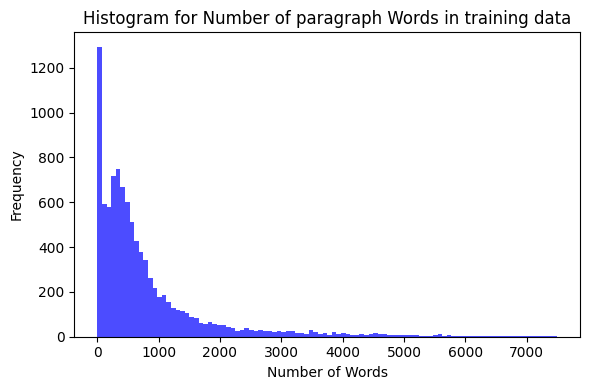

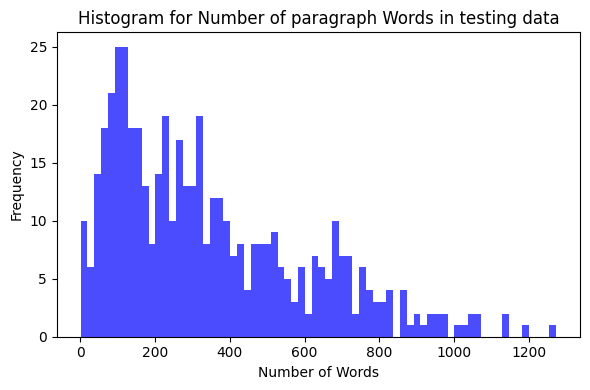

In [13]:
path_to_test_dataset= "./results_title_generation.csv"
path_to_train_dataset= "../LLM_Data/cleaned_wikipedia_sections.csv"


plot_histogram_fornum_of_words(path_to_train_dataset,"training","text")
# plot_histogram_fornum_of_words(path_to_train_dataset,"training","title")
plot_histogram_fornum_of_words(path_to_test_dataset,"testing","text")
# plot_histogram_fornum_of_words(path_to_test_dataset,"testing","title")

In [8]:
def get_avg_size(path_to_dataset,text_or_title):
    df= pd.read_csv(path_to_dataset)
    # df['num_words'] = df[text_or_title].apply(lambda x: len(x.split()))
    
    df['num_words'] = df[text_or_title].apply(lambda x: len(re.split(r' |_| ', x)))
    return df['num_words'].mean()
    

In [9]:
def get_median_size(path_to_dataset, text_or_title):
    df = pd.read_csv(path_to_dataset)
    
    # df['num_words'] = df[text_or_title].apply(lambda x: len(x.split()))
    df['num_words'] = df[text_or_title].apply(lambda x: len(re.split(r' |_| ', x)))
    
    return df['num_words'].median()

In [10]:
print(get_avg_size(path_to_train_dataset,"text"))
print(get_avg_size(path_to_train_dataset,"title"))
print(get_avg_size(path_to_test_dataset,"text"))
print(get_avg_size(path_to_test_dataset,"title"))


861.3672842665575
2.360528201453578
342.6742268041237
3.1690721649484535


In [11]:
print(get_median_size(path_to_train_dataset,"text"))
print(get_median_size(path_to_train_dataset,"title"))
print(get_median_size(path_to_test_dataset,"text"))
print(get_median_size(path_to_test_dataset,"title"))


483.0
2.0
277.0
3.0


Evaluating the Test Results

In [26]:
def evaluate_baseline(path_to_dataset,model_to_evaluate, metric):
    dataset=pd.read_csv(path_to_dataset)
    pred = dataset[model_to_evaluate]
    # dataset['title'] = dataset['title'].str.replace('_', ' ')
    
    score= metric.compute(predictions=pred, references=dataset["title"], use_stemmer=True)
    rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
    rouge_dict = dict((rn, round(score[rn].mid.fmeasure * 100, 2)) for rn in rouge_names)
    
    print(f"\n The Rouge score for {model_to_evaluate} is : ")
    print(rouge_dict)
    
    return rouge_dict
    

In [16]:
path_to_dataset= "./results_title_generation.csv"
metric = load_metric("rouge")

/tmp/ipykernel_3143861/2275140435.py:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("rouge")


In [27]:
df=pd.read_csv(path_to_dataset)
print(df.columns)

Index(['Unnamed: 0', 'text', 'title', 'LLAMA2_title1',
       'LLAMA2_title1_without_trim', 'LLAMA2_without_finetunning',
       'LLAMA2_without_finetunning_without_trim',
       'Flan T5 L after finetunning', 'Flan T5 L original',
       'Falcon 7B after finetunning', 'Falcon 7B original',
       'T5 Small after finetunning', 'T5 Small Original', 'T5 Small original'],
      dtype='object')


In [21]:
r1=evaluate_baseline(path_to_dataset,'T5 Small original', metric)
# r2=evaluate_baseline(path_to_dataset,'LLAMA2_title2', metric)
r3=evaluate_baseline(path_to_dataset,'T5 Small after finetunning', metric)


 The Rouge score for T5 Small original is : 
{'rouge1': 9.35, 'rouge2': 2.57, 'rougeL': 8.57, 'rougeLsum': 8.6}

 The Rouge score for T5 Small after finetunning is : 
{'rouge1': 19.42, 'rouge2': 6.97, 'rougeL': 18.53, 'rougeLsum': 18.57}


In [22]:
r1=evaluate_baseline(path_to_dataset,'Flan T5 L original', metric)
# r2=evaluate_baseline(path_to_dataset,'LLAMA2_title2', metric)
r3=evaluate_baseline(path_to_dataset,'Flan T5 L after finetunning', metric)


 The Rouge score for Flan T5 L original is : 
{'rouge1': 6.27, 'rouge2': 1.09, 'rougeL': 5.93, 'rougeLsum': 5.96}

 The Rouge score for Flan T5 L after finetunning is : 
{'rouge1': 23.51, 'rouge2': 8.87, 'rougeL': 22.05, 'rougeLsum': 22.12}


In [23]:
r1=evaluate_baseline(path_to_dataset,'Falcon 7B original', metric)
# r2=evaluate_baseline(path_to_dataset,'LLAMA2_title2', metric)
r3=evaluate_baseline(path_to_dataset,'Falcon 7B after finetunning', metric)


 The Rouge score for Falcon 7B original is : 
{'rouge1': 4.66, 'rouge2': 0.85, 'rougeL': 4.41, 'rougeLsum': 4.5}

 The Rouge score for Falcon 7B after finetunning is : 
{'rouge1': 20.81, 'rouge2': 7.02, 'rougeL': 19.28, 'rougeLsum': 19.19}


In [24]:
r1=evaluate_baseline(path_to_dataset,'LLAMA2_title1', metric)
# r2=evaluate_baseline(path_to_dataset,'LLAMA2_title2', metric)
# r3=evaluate_baseline(path_to_dataset,'Flan T5 L after finetunning', metric)


 The Rouge score for LLAMA2_title1 is : 
{'rouge1': 18.41, 'rouge2': 6.27, 'rougeL': 17.3, 'rougeLsum': 17.4}
